In [80]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pickle

In [165]:
supplies = pd.read_csv('Supplies4.csv', parse_dates=[0], index_col=[0])

In [166]:
supplies.head()

,supplies
date,
2009-07-20,2016
2009-07-21,2153
2009-07-22,4211
2009-07-23,2448
2009-07-24,3216


In [167]:
f_supplies = supplies.iloc[:, [0]]

In [168]:
f_supplies.head()

,supplies
date,
2009-07-20,2016
2009-07-21,2153
2009-07-22,4211
2009-07-23,2448
2009-07-24,3216


In [169]:
type(f_supplies)

pandas.core.frame.DataFrame

In [170]:
series_value = f_supplies.values

In [171]:
type(series_value)

numpy.ndarray

In [172]:
f_supplies.size

3999

In [173]:
f_supplies.tail()

,supplies
date,
2020-06-26,3064
2020-06-27,4511
2020-06-28,2756
2020-06-29,4032
2020-06-30,2251


In [174]:
f_supplies.describe()

,supplies
count,3999.000000
mean,2985.755939
std,844.878364
min,2000.000000
25%,2200.000000
50%,2768.000000
75%,3750.000000
max,4883.000000


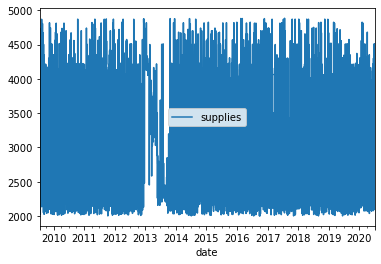

In [175]:
f_supplies.plot()

In [176]:
f_supplies_mean = f_supplies.rolling(window = 50).mean()

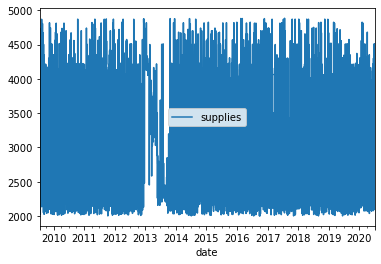

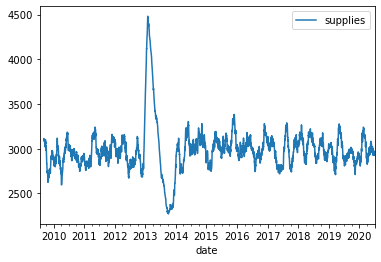

In [177]:
f_supplies.plot()
f_supplies_mean.plot()

In [178]:
value = pd.DataFrame(series_value)

In [179]:
supplies_df = pd.concat([value, value.shift(1)], axis=1)

In [180]:
supplies_df.head()

,0,0
0,2016,NaN
1,2153,2016.0
2,4211,2153.0
3,2448,4211.0
4,3216,2448.0


In [181]:
supplies_df.columns = ['Actual_usage', 'Forecast_usage']

In [182]:
supplies_df.head()

,Actual_usage,Forecast_usage
0,2016,NaN
1,2153,2016.0
2,4211,2153.0
3,2448,4211.0
4,3216,2448.0


In [183]:
supplies_test = supplies_df[1:]

In [184]:
supplies_test.head()

,Actual_usage,Forecast_usage
1,2153,2016.0
2,4211,2153.0
3,2448,4211.0
4,3216,2448.0
5,2210,3216.0


In [185]:
supplies_error = mean_squared_error(supplies_test.Actual_usage, supplies_test.Forecast_usage)

In [186]:
supplies_error

1271692.416458229

In [187]:
np.sqrt(supplies_error)

1127.6934053448344

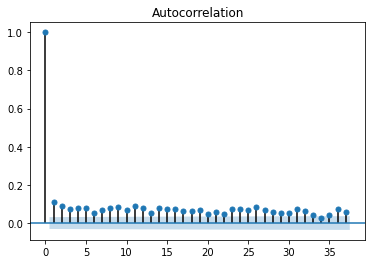

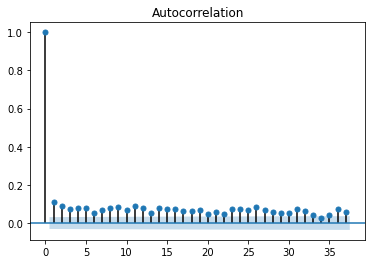

In [188]:
# plot_acf is to identify parameter Q
# ARIMA(p, d, q)

plot_acf(f_supplies)

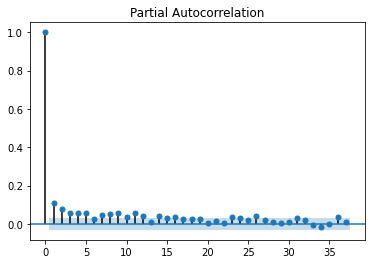

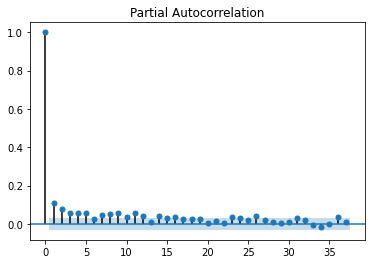

In [189]:
# to identify the value of p

plot_pacf(f_supplies)

In [190]:
f_supplies.size

3999

In [221]:
supplies_train, supplies_test = np.split(f_supplies, [int(.75*len(f_supplies))])

In [225]:
supplies_train.size

2999

In [226]:
# p=2,3 d=0 q=3,4


In [227]:
supplies_test.size

1000

In [228]:
supplies_model = ARIMA(supplies_train, order=(3, 0, 3))

C:\Users\Piyumal\anaconda3\envs\py38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [229]:
supplies_model_fit = supplies_model.fit()

In [230]:
supplies_model_fit.aic

48780.0378694968

In [235]:
supplies_forecast = supplies_model_fit.forecast(steps = supplies_test.size)[0]

In [236]:
supplies_forecast

array([2839.10279041, 2823.44683572, 2862.91528533, 2837.90150615,
       2870.94709   , 2844.59891293, 2875.19145476, 2849.3639452 ,
       2878.47611412, 2853.57240493, 2881.46920591, 2857.551707  ,
       2884.32998152, 2861.38214333, 2887.0977414 , 2865.08567724,
       2889.78347581, 2868.67042987, 2892.39145815, 2872.1411652 ,
       2894.92433379, 2875.5017636 , 2897.38432029, 2878.75580774,
       2899.77349128, 2881.90672357, 2902.09384443, 2884.95781635,
       2904.34731858, 2887.91228197, 2906.53579878, 2890.77321223,
       2908.66111852, 2893.54359864, 2910.72506126, 2896.22633585,
       2912.72936175, 2898.82422486, 2914.6757073 , 2901.33997603,
       2916.56573903, 2903.77621216, 2918.40105304, 2906.13547124,
       2920.1832016 , 2908.42020935, 2921.9136943 , 2910.63280324,
       2923.59399914, 2912.775553  , 2925.22554365, 2914.8506845 ,
       2926.80971591, 2916.8603519 , 2928.34786565, 2918.80663991,
       2929.84130522, 2920.69156611, 2931.29131057, 2922.51708

In [237]:
supplies_test

,supplies
date,
2017-10-05,3179
2017-10-06,2216
2017-10-07,2529
2017-10-08,2478
2017-10-09,2560
...,...
2020-06-26,3064
2020-06-27,4511
2020-06-28,2756


In [238]:
np.sqrt(mean_squared_error(supplies_test, supplies_forecast))

820.9255035777073

In [239]:
# saving model to disk

#pickle.dump([supplies_model_fit, supplies_forecast], open('model.pkl', 'wb'))

with open('model.pickle', 'wb') as f:
    pickle.dump([supplies_test, supplies_forecast, supplies_model_fit], f)

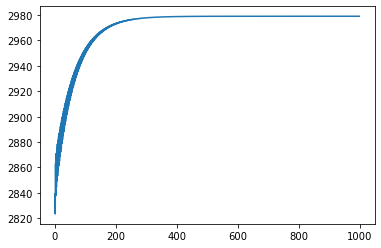

In [240]:
plt.plot(supplies_forecast)

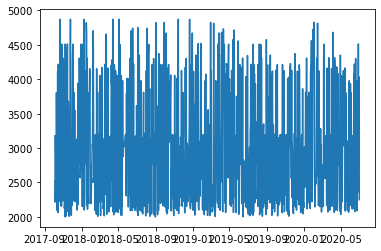

In [241]:
plt.plot(supplies_test)